<a href="https://colab.research.google.com/github/codeboy47/Netflix-movies-and-tv-shows-clustering/blob/main/Individual_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [373]:
# Import package
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [374]:
# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [375]:
# Import Sklearn Libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [376]:
## Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [377]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data

In [378]:
# loading csv File
file_path = '/content/drive/MyDrive/Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
netflix_df = pd.read_csv(file_path, index_col = False)

In [379]:
# printing shape of the dataset
print("Shape of the Dataset:", netflix_df.shape)

Shape of the Dataset: (7787, 12)


In [380]:
# Using head function to get first 5 rows
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [381]:
# using tail with a transpose to get the view of columns
netflix_df.tail().T

,7782,7783,7784,7785,7786
show_id,s7783,s7784,s7785,s7786,s7787
type,Movie,Movie,Movie,TV Show,Movie
title,Zozo,Zubaan,Zulu Man in Japan,Zumbo's Just Desserts,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
director,Josef Fares,Mozez Singh,NaN,NaN,Sam Dunn
cast,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Nasty C,"Adriano Zumbo, Rachel Khoo",NaN
country,"Sweden, Czech Republic, United Kingdom, Denmar...",India,NaN,Australia,"United Kingdom, Canada, United States"
date_added,"October 19, 2020","March 2, 2019","September 25, 2020","October 31, 2020","March 1, 2020"
release_year,2005,2015,2019,2019,2019
rating,TV-MA,TV-14,TV-MA,TV-PG,TV-MA
duration,99 min,111 min,44 min,1 Season,90 min


In [382]:
# get the info of datasets
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [383]:
# checking if any null values are present in our dataset
count_of_null_values = netflix_df.isnull().sum()
count_of_null_values

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [384]:
# Unique values for each column
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

As we can see:
* director column has 2389 null values
* cast column has 718 null values
* country column has 507 null values
* date_added column has 10 null values
* rating column has 7 null values

In [385]:
# checking duplicates in our dataset
value = len(netflix_df[netflix_df.duplicated()])
print("Total no. of duplicates = ", value)

Total no. of duplicates =  0


#### As we can see there are no duplicates present in our dataset

In [ ]:
# Setting the size of the graphs and also style of seaborn
style.use('seaborn-poster')
style.use('ggplot')
sns.set(style = 'darkgrid')

In [ ]:
# Function for plotting varoius graphs using sns
def create_sns_plot(plot_name, x_name, y_name, data_name, palette_color, title, xlabel, ylabel, hue_name = None):
  fig, ax = plt.subplots(figsize = (20, 8))

  # creating plot by assigning values to the sns parameters
  plot_name(x = x_name, y = y_name, hue = hue_name, data = data_name, palette = palette_color)
  # set title
  plt.title(title, fontsize = 20)
  # set xlabel
  plt.xlabel(xlabel, fontsize = 15)
  # set ylabel
  plt.ylabel(ylabel, fontsize = 15)

<br>

# **Understanding the features of our dataset**

### Finding the number of unique shows in the dataset

In [ ]:
# no. of unique users
netflix_df['show_id'].nunique()

7787

In [ ]:
# no. of records
netflix_df.shape[0]

7787

Inference: <br>
As we can see, the number of unique shows is same as the total number of observations.

In [ ]:
netflix_df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

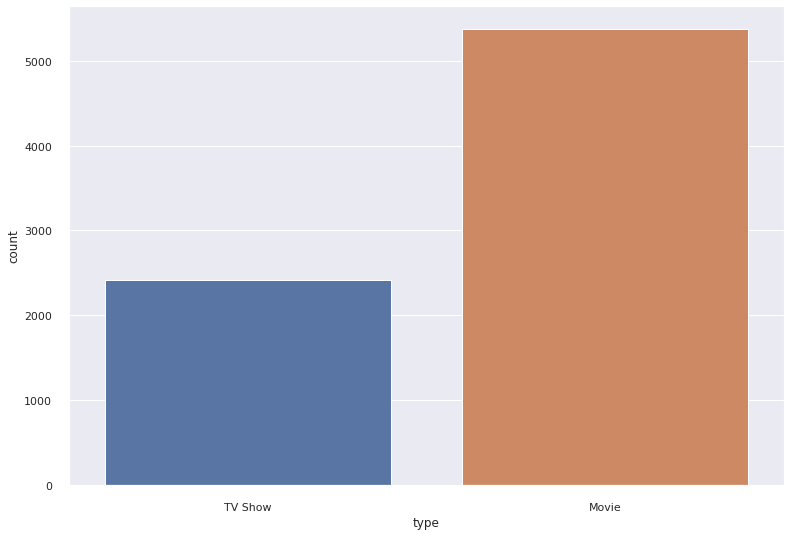

In [ ]:
# count plot for type column
sns.countplot(x = netflix_df['type'])

Inference: Movies are more in number compared to TV shows on Netflix.

## Top 10 directors with most number of movies

In [ ]:
# Getting top 10 director-wise count of movie/shows
year_count = netflix_df.groupby(['director'], as_index = False).agg({'show_id': 'count'}).sort_values('show_id', ascending = False).rename(columns = {'show_id' : 'frequency'})[0:10]
year_count

,director,frequency
3078,"Raúl Campos, Jan Suter",18
2321,Marcus Raboy,16
1607,Jay Karas,14
624,Cathy Garcia-Molina,13
2388,Martin Scorsese,12
1604,Jay Chapman,12
4007,Youssef Chahine,12
3599,Steven Spielberg,10
875,David Dhawan,9
3262,Ryan Polito,8


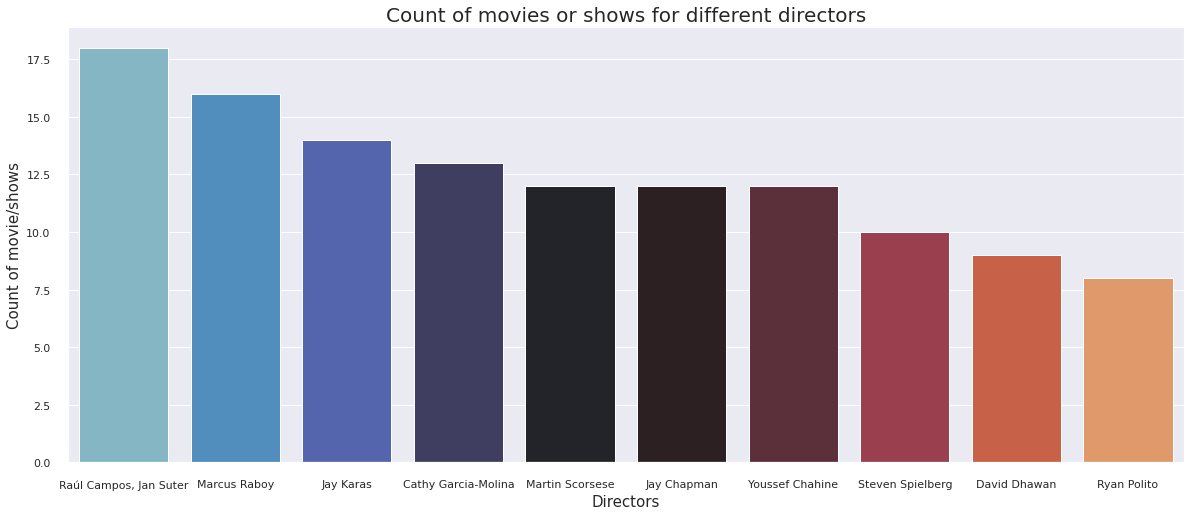

In [ ]:
# calling create_sns_plot function to plot bar graph
create_sns_plot(sns.barplot, 'director', 'frequency', year_count, 'icefire', 'Count of movies or shows for different directors', 'Directors', 'Count of movie/shows')

Inference: Raúl Campos, Jan Suter have directed the most number of movies followed by Marcus Raboy.